In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("D:\\tala\\red wine.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
#code for understanding how many null or missing value we have in each column
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
data["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [6]:
data["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
data["quality"].mean()

5.6360225140712945

In [8]:
data["quality"].median()

6.0

In [9]:
data["quality"].mode()

0    5
Name: quality, dtype: int64

In [10]:
bins=(2, 6.5 , 8)  # (2 groups, boundry , max)
names=["bad" , "good"]
data["quality"]=pd.cut(data["quality"] , bins=bins , labels=names)
data["quality"].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [11]:
#it is like mapping 
from sklearn.preprocessing import LabelEncoder

In [12]:
label_quality=LabelEncoder()
data["quality"]=label_quality.fit_transform(data["quality"])
#fit_transform means after changing its form we fit and tarnsforming the type of that column
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [13]:
data["quality"].value_counts()

0    1382
1     217
Name: quality, dtype: int64

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

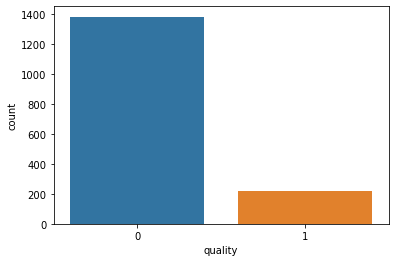

In [14]:
sns.countplot(data["quality"])

# selecting inputs and target

In [15]:
x=data.drop(["quality"] , axis=1)
y=data["quality"]

# splitting our dataset to train and test

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train , x_test ,y_train , y_test=train_test_split(x ,y , test_size=0.2 , random_state=42)

In [18]:
x_train.shape  , x_test.shape

((1279, 11), (320, 11))

# standardizing our inputs

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
#training our dataset by randon forest classifier
rfc=RandomForestClassifier(n_estimators=200) #how mant trees(models) do you need?
rfc.fit(x_train ,y_train)

RandomForestClassifier(n_estimators=200)

In [23]:
pred_rfc=rfc.predict(x_test)

In [24]:
pred_rfc[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

# reporting(classification report)
support medium size of data

In [25]:
from sklearn.metrics import confusion_matrix ,classification_report

In [26]:
print(classification_report(y_test , pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       273
           1       0.68      0.36      0.47        47

    accuracy                           0.88       320
   macro avg       0.79      0.67      0.70       320
weighted avg       0.87      0.88      0.87       320



In [28]:
print(confusion_matrix(y_test , pred_rfc))
#(265 correct and 8 wrong) for bad wine and (30 correct and 1 wrong) for good wine

[[265   8]
 [ 30  17]]


# SVM(Suport Vectors Machine) classification model
support smart amount of data

In [31]:
from sklearn import svm
from sklearn.svm import SVC

In [33]:
clf=svm.SVC()
clf.fit(x_train ,y_train)

SVC()

In [36]:
pred_clf=clf.predict(x_test)

In [38]:
print(classification_report(y_test , pred_clf))
print(confusion_matrix(y_test , pred_clf))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

[[268   5]
 [ 35  12]]


# Neural Networks Model
support huge amount of data


In [40]:
from sklearn.neural_network import MLPClassifier

In [42]:
mlpc=MLPClassifier(hidden_layer_sizes=(11,11,11) , max_iter=500)
#we have 3 hidden layer and in each of layer ther are 11 neural
#if we set so many hidden layer maybe be face with over fitting
#default iteration is 200 

In [43]:
mlpc.fit(x_train , y_train)

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(11, 11, 11), max_iter=500)

In [44]:
pred_mlpc=mlpc.predict(x_test)

In [46]:
print(classification_report(y_test , pred_mlpc))
print(confusion_matrix(y_test , pred_mlpc))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       273
           1       0.71      0.57      0.64        47

    accuracy                           0.90       320
   macro avg       0.82      0.77      0.79       320
weighted avg       0.90      0.90      0.90       320

[[262  11]
 [ 20  27]]
